## Set up the dependencies

In [1]:
# for reading and validating data
import emeval.input.spec_details as eisd
import emeval.input.phone_view as eipv
import emeval.input.eval_view as eiev
import arrow

In [2]:
# Visualization helpers
import emeval.viz.phone_view as ezpv
import emeval.viz.eval_view as ezev

In [13]:
# For plots
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# For maps
import folium
import branca.element as bre

In [5]:
# For easier debugging while working on modules
import importlib

In [6]:
import pandas as pd
import numpy as np

## The spec

The spec defines what experiments were done, and over which time ranges. Once the experiment is complete, most of the structure is read back from the data, but we use the spec to validate that it all worked correctly. The spec also contains the ground truth for the legs. Here, we read the spec for the trip to UC Berkeley.

In [7]:
DATASTORE_URL = "http://cardshark.cs.berkeley.edu"
AUTHOR_EMAIL = "shankari@eecs.berkeley.edu"
sd_la = eisd.SpecDetails(DATASTORE_URL, AUTHOR_EMAIL, "unimodal_trip_car_bike_mtv_la")
sd_sj = eisd.SpecDetails(DATASTORE_URL, AUTHOR_EMAIL, "car_scooter_brex_san_jose")
sd_ucb = eisd.SpecDetails(DATASTORE_URL, AUTHOR_EMAIL, "train_bus_ebike_mtv_ucb")

About to retrieve messages using {'user': 'shankari@eecs.berkeley.edu', 'key_list': ['config/evaluation_spec'], 'start_time': 0, 'end_time': 1579500655}
response = <Response [200]>
Found 15 entries
After iterating over 15 entries, entry found
Found spec = Round trip car and bike trip in the South Bay
Evaluation ran from 2019-07-20T00:00:00-07:00 -> 2019-09-30T00:00:00-07:00
About to retrieve messages using {'user': 'shankari@eecs.berkeley.edu', 'key_list': ['config/evaluation_spec'], 'start_time': 0, 'end_time': 1579500657}
response = <Response [200]>
Found 15 entries
After iterating over 15 entries, entry found
Found spec = Multi-modal car scooter BREX trip to San Jose
Evaluation ran from 2019-07-20T00:00:00-07:00 -> 2019-09-30T00:00:00-07:00
About to retrieve messages using {'user': 'shankari@eecs.berkeley.edu', 'key_list': ['config/evaluation_spec'], 'start_time': 0, 'end_time': 1579500659}
response = <Response [200]>
Found 15 entries
After iterating over 15 entries, entry found
Fou

## Loading the data into a dataframe

In [8]:
pv_la = eipv.PhoneView(sd_la)

-------------------- About to read transitions from server --------------------
Reading data for android phones
Loading transitions for phone ucb-sdb-android-1
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['manual/evaluation_transition'], 'start_time': 1563606000, 'end_time': 1569826800}
response = <Response [200]>
Found 68 entries
Loading transitions for phone ucb-sdb-android-2
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['manual/evaluation_transition'], 'start_time': 1563606000, 'end_time': 1569826800}
response = <Response [200]>
Found 68 entries
Loading transitions for phone ucb-sdb-android-3
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['manual/evaluation_transition'], 'start_time': 1563606000, 'end_time': 1569826800}
response = <Response [200]>
Found 68 entries
Loading transitions for phone ucb-sdb-android-4
About to retrieve messages using {'user': 'ucb-sdb-android-4', 'key_list': ['manual/

response = <Response [200]>
Found 7 entries
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['background/battery'], 'start_time': 1564334117.295, 'end_time': 1564343045.9}
response = <Response [200]>
Found 11 entries
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['background/battery'], 'start_time': 1564351305.633, 'end_time': 1564360156.392}
response = <Response [200]>
Found 9 entries
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['background/battery'], 'start_time': 1565571034.93, 'end_time': 1565579009.992}
response = <Response [200]>
Found 11 entries
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['background/battery'], 'start_time': 1567271203.764, 'end_time': 1567279427.961}
response = <Response [200]>
Found 9 entries
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['background/battery'], 'start_time': 1567288614.642, 'end_time': 1567297340.9

response = <Response [200]>
Found 30 entries
About to retrieve messages using {'user': 'ucb-sdb-ios-4', 'key_list': ['background/battery'], 'start_time': 1564274276.021558, 'end_time': 1564282332.15351}
response = <Response [200]>
Found 11 entries
About to retrieve messages using {'user': 'ucb-sdb-ios-4', 'key_list': ['background/battery'], 'start_time': 1564334069.1049929, 'end_time': 1564343007.721693}
response = <Response [200]>
Found 11 entries
About to retrieve messages using {'user': 'ucb-sdb-ios-4', 'key_list': ['background/battery'], 'start_time': 1564351193.2504249, 'end_time': 1564360033.887364}
response = <Response [200]>
Found 12 entries
About to retrieve messages using {'user': 'ucb-sdb-ios-4', 'key_list': ['background/battery'], 'start_time': 1565570989.744656, 'end_time': 1565578915.798939}
response = <Response [200]>
Found 13 entries
About to retrieve messages using {'user': 'ucb-sdb-ios-4', 'key_list': ['background/battery'], 'start_time': 1567271164.779111, 'end_time'

response = <Response [200]>
Found 1868 entries
Retrieved 1868 entries with timestamps [1564274558.354, 1564274558.727, 1564274564.028, 1564274565, 1564274566, 1564274567, 1564274568, 1564274569, 1564274570, 1564274571]...
About to retrieve data for ucb-sdb-android-2 from 1564280671.731 -> 1564282402.886
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['background/location'], 'start_time': 1564280671.731, 'end_time': 1564282402.886}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1564280652]...
About to retrieve data for ucb-sdb-android-2 from 1564274304.968 -> 1564282402.886
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['background/filtered_location'], 'start_time': 1564274304.968, 'end_time': 1564282402.886}
response = <Response [200]>
Found 1854 entries
Retrieved 1854 entries with timestamps [1564274558.727, 1564274565, 1564274566, 1564274567, 1564274568, 1564274569, 1564274570, 1564274571, 1564

response = <Response [200]>
Found 2121 entries
Retrieved 2121 entries with timestamps [1567288912, 1567288913, 1567288914, 1567288915, 1567288916, 1567288917, 1567288918, 1567288919, 1567288920, 1567288921]...
About to retrieve data for ucb-sdb-android-2 from 1567296306.499 -> 1567297357.197
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['background/filtered_location'], 'start_time': 1567296306.499, 'end_time': 1567297357.197}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1567296305.357]...
About to retrieve data for ucb-sdb-android-3 from 1564274288.319 -> 1564282423.072
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['background/location'], 'start_time': 1564274288.319, 'end_time': 1564282423.072}
response = <Response [200]>
Found 95 entries
Retrieved 95 entries with timestamps [1564274778.389, 1564274778.389, 1564274795, 1564274812.987, 1564274819, 1564274844.433, 1564274875, 1564274907.723, 

response = <Response [200]>
Found 2142 entries
Retrieved 2142 entries with timestamps [1567288849, 1567288908.399, 1567288910, 1567288911, 1567288912, 1567288913, 1567288914, 1567288915, 1567288916, 1567288917]...
About to retrieve data for ucb-sdb-android-3 from 1567296442.457 -> 1567297394.837
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['background/location'], 'start_time': 1567296442.457, 'end_time': 1567297394.837}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1567296441.488]...
About to retrieve data for ucb-sdb-android-3 from 1567288638.503 -> 1567297394.837
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['background/filtered_location'], 'start_time': 1567288638.503, 'end_time': 1567297394.837}
response = <Response [200]>
Found 2140 entries
Retrieved 2140 entries with timestamps [1567288908.399, 1567288910, 1567288911, 1567288912, 1567288913, 1567288914, 1567288915, 1567288916, 15672889

About to retrieve data for ucb-sdb-ios-1 from 1564351246.07085 -> 1564359997.0496612
About to retrieve messages using {'user': 'ucb-sdb-ios-1', 'key_list': ['background/location'], 'start_time': 1564351246.07085, 'end_time': 1564359997.0496612}
response = <Response [200]>
Found 2214 entries
Retrieved 2214 entries with timestamps [1564351245.890137, 1564351251.02554, 1564351252.0238216, 1564351253.022198, 1564351254.0206494, 1564351255.0192485, 1564351257.0167162, 1564351258.0155365, 1564351259.0144756, 1564351261.0124218]...
About to retrieve data for ucb-sdb-ios-1 from 1564359983.113141 -> 1564359997.0496612
About to retrieve messages using {'user': 'ucb-sdb-ios-1', 'key_list': ['background/location'], 'start_time': 1564359983.113141, 'end_time': 1564359997.0496612}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1564359982.9988208]...
About to retrieve data for ucb-sdb-ios-1 from 1564351246.07085 -> 1564359997.0496612
About to retrieve messages using 

response = <Response [200]>
Found 1479 entries
Retrieved 1479 entries with timestamps [1564351652.800541, 1564351652.81194, 1564351656.9998531, 1564351657.9998388, 1564351658.9998343, 1564351659.9998317, 1564351660.999824, 1564351661.9998145, 1564351662.9998102, 1564351663.999807]...
About to retrieve data for ucb-sdb-ios-2 from 1564358143.888009 -> 1564360024.574613
About to retrieve messages using {'user': 'ucb-sdb-ios-2', 'key_list': ['background/location'], 'start_time': 1564358143.888009, 'end_time': 1564360024.574613}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1564358143.830019]...
About to retrieve data for ucb-sdb-ios-2 from 1564351227.1936831 -> 1564360024.574613
About to retrieve messages using {'user': 'ucb-sdb-ios-2', 'key_list': ['background/filtered_location'], 'start_time': 1564351227.1936831, 'end_time': 1564360024.574613}
response = <Response [200]>
Found 1478 entries
Retrieved 1478 entries with timestamps [1564351652.81194, 156435

response = <Response [200]>
Found 279 entries
Retrieved 279 entries with timestamps [1564334592.7409182, 1564334593.232298, 1564334593.94751, 1564334593.94751, 1564334599.946772, 1564334607.938235, 1564334614.3596, 1564334620.903113, 1564334627.341895, 1564334633.779057]...
About to retrieve data for ucb-sdb-ios-3 from 1564341040.392057 -> 1564342996.99437
About to retrieve messages using {'user': 'ucb-sdb-ios-3', 'key_list': ['background/location'], 'start_time': 1564341040.392057, 'end_time': 1564342996.99437}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1564341040.324661]...
About to retrieve data for ucb-sdb-ios-3 from 1564334084.0051398 -> 1564342996.99437
About to retrieve messages using {'user': 'ucb-sdb-ios-3', 'key_list': ['background/filtered_location'], 'start_time': 1564334084.0051398, 'end_time': 1564342996.99437}
response = <Response [200]>
Found 277 entries
Retrieved 277 entries with timestamps [1564334593.94751, 1564334593.94751, 1564

response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1567295578.057469]...
About to retrieve data for ucb-sdb-ios-4 from 1564274276.021558 -> 1564282332.15351
About to retrieve messages using {'user': 'ucb-sdb-ios-4', 'key_list': ['background/location'], 'start_time': 1564274276.021558, 'end_time': 1564282332.15351}
response = <Response [200]>
Found 0 entries
Retrieved 0 entries with timestamps []...
About to retrieve data for ucb-sdb-ios-4 from 1564274276.021558 -> 1564282332.15351
About to retrieve messages using {'user': 'ucb-sdb-ios-4', 'key_list': ['background/filtered_location'], 'start_time': 1564274276.021558, 'end_time': 1564282332.15351}
response = <Response [200]>
Found 0 entries
Retrieved 0 entries with timestamps []...
About to retrieve data for ucb-sdb-ios-4 from 1564334069.1049929 -> 1564343007.721693
About to retrieve messages using {'user': 'ucb-sdb-ios-4', 'key_list': ['background/location'], 'start_time': 1564334069.1049929, 'end_time': 15

response = <Response [200]>
Found 718 entries
Retrieved 718 entries with timestamps [1567288618.654, 1567288618.705, 1567288631.474, 1567288631.508, 1567288644.499, 1567288656.614, 1567288668.999, 1567288682.631, 1567288695.539, 1567288703.517]...
About to retrieve data for ucb-sdb-android-1 from 1567297335.148 -> 1567297340.931
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['background/motion_activity'], 'start_time': 1567297335.148, 'end_time': 1567297340.931}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1567297335.148]...
motion activity has not been processed, copying write_ts -> ts
About to retrieve data for ucb-sdb-android-2 from 1564274304.968 -> 1564282402.886
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['background/motion_activity'], 'start_time': 1564274304.968, 'end_time': 1564282402.886}
response = <Response [200]>
Found 174 entries
Retrieved 174 entries with timestamps [15642745

response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1564358258.347]...
motion activity has not been processed, copying write_ts -> ts
About to retrieve data for ucb-sdb-android-3 from 1565571018.59 -> 1565578932.123
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['background/motion_activity'], 'start_time': 1565571018.59, 'end_time': 1565578932.123}
response = <Response [200]>
Found 437 entries
Retrieved 437 entries with timestamps [1565571245.513, 1565571255.862, 1565571272.654, 1565571284.949, 1565571290.953, 1565571296.96, 1565571297.455, 1565571308.955, 1565571309.468, 1565571315.43]...
About to retrieve data for ucb-sdb-android-3 from 1565577786.12 -> 1565578932.123
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['background/motion_activity'], 'start_time': 1565577786.12, 'end_time': 1565578932.123}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1565577786.12]...


response = <Response [200]>
Found 472 entries
Retrieved 472 entries with timestamps [1564351283.6382508, 1564351323.8419127, 1564351326.3507926, 1564351471.793641, 1564351564.5028896, 1564351577.031905, 1564351597.0661352, 1564351617.101654, 1564351629.6283417, 1564351682.2153893]...
About to retrieve data for ucb-sdb-ios-1 from 1564359606.3683307 -> 1564359997.0496612
About to retrieve messages using {'user': 'ucb-sdb-ios-1', 'key_list': ['background/motion_activity'], 'start_time': 1564359606.3683307, 'end_time': 1564359997.0496612}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1564359606.3683307]...
About to retrieve data for ucb-sdb-ios-1 from 1565570971.32563 -> 1565578881.489321
About to retrieve messages using {'user': 'ucb-sdb-ios-1', 'key_list': ['background/motion_activity'], 'start_time': 1565570971.32563, 'end_time': 1565578881.489321}
response = <Response [200]>
Found 470 entries
Retrieved 470 entries with timestamps [1565571015.1305943, 

response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1567297297.920746]...
About to retrieve data for ucb-sdb-ios-3 from 1564274265.212364 -> 1564282322.549677
About to retrieve messages using {'user': 'ucb-sdb-ios-3', 'key_list': ['background/motion_activity'], 'start_time': 1564274265.212364, 'end_time': 1564282322.549677}
response = <Response [200]>
Found 225 entries
Retrieved 225 entries with timestamps [1564274317.477725, 1564274347.4777246, 1564274437.477725, 1564274542.4777246, 1564274552.4777243, 1564274607.709919, 1564274615.3459363, 1564274648.6975765, 1564274650.9377193, 1564274653.479989]...
About to retrieve data for ucb-sdb-ios-3 from 1564282309.445576 -> 1564282322.549677
About to retrieve messages using {'user': 'ucb-sdb-ios-3', 'key_list': ['background/motion_activity'], 'start_time': 1564282309.445576, 'end_time': 1564282322.549677}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1564282309.445576]...
About 

response = <Response [200]>
Found 238 entries
Retrieved 238 entries with timestamps [1565570996.6079254, 1565571086.6079254, 1565571216.6079254, 1565571251.6079254, 1565571261.6079254, 1565571311.607926, 1565571351.607926, 1565571361.607926, 1565571382.6565979, 1565571387.6565979]...
About to retrieve data for ucb-sdb-ios-4 from 1565578834.0040646 -> 1565578915.798939
About to retrieve messages using {'user': 'ucb-sdb-ios-4', 'key_list': ['background/motion_activity'], 'start_time': 1565578834.0040646, 'end_time': 1565578915.798939}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1565578834.0040646]...
About to retrieve data for ucb-sdb-ios-4 from 1567271164.779111 -> 1567279350.7691588
About to retrieve messages using {'user': 'ucb-sdb-ios-4', 'key_list': ['background/motion_activity'], 'start_time': 1567271164.779111, 'end_time': 1567279350.7691588}
response = <Response [200]>
Found 151 entries
Retrieved 151 entries with timestamps [1567271272.0296657

response = <Response [200]>
Found 3 entries
transition has not been processed, creating ts -> fmt_time
About to retrieve messages using {'user': 'ucb-sdb-android-4', 'key_list': ['statemachine/transition'], 'start_time': 1567271197.466, 'end_time': 1567279384.692}
response = <Response [200]>
Found 3 entries
transition has not been processed, creating ts -> fmt_time
About to retrieve messages using {'user': 'ucb-sdb-android-4', 'key_list': ['statemachine/transition'], 'start_time': 1567288647.374, 'end_time': 1567297374.928}
response = <Response [200]>
Found 1 entries
transition has not been processed, creating ts -> fmt_time
Processing data for ios phones
About to retrieve messages using {'user': 'ucb-sdb-ios-1', 'key_list': ['statemachine/transition'], 'start_time': 1564274247.275763, 'end_time': 1564282290.729272}
response = <Response [200]>
Found 18 entries
transition has not been processed, creating ts -> fmt_time
About to retrieve messages using {'user': 'ucb-sdb-ios-1', 'key_list

In [9]:
pv_sj = eipv.PhoneView(sd_sj)

-------------------- About to read transitions from server --------------------
Reading data for android phones
Loading transitions for phone ucb-sdb-android-1
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['manual/evaluation_transition'], 'start_time': 1563606000, 'end_time': 1569826800}
response = <Response [200]>
Found 68 entries
Loading transitions for phone ucb-sdb-android-2
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['manual/evaluation_transition'], 'start_time': 1563606000, 'end_time': 1569826800}
response = <Response [200]>
Found 68 entries
Loading transitions for phone ucb-sdb-android-3
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['manual/evaluation_transition'], 'start_time': 1563606000, 'end_time': 1569826800}
response = <Response [200]>
Found 68 entries
Loading transitions for phone ucb-sdb-android-4
About to retrieve messages using {'user': 'ucb-sdb-android-4', 'key_list': ['manual/

response = <Response [200]>
Found 9 entries
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['background/battery'], 'start_time': 1563896743.139, 'end_time': 1563917431.489}
response = <Response [200]>
Found 11 entries
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['background/battery'], 'start_time': 1564244087.215, 'end_time': 1564263878.59}
response = <Response [200]>
Found 10 entries
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['background/battery'], 'start_time': 1565026006.793, 'end_time': 1565050217.383}
response = <Response [200]>
Found 12 entries
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['background/battery'], 'start_time': 1565116007.631, 'end_time': 1565140213.84}
response = <Response [200]>
Found 11 entries
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['background/battery'], 'start_time': 1565194658.17, 'end_time': 1565217816

About to retrieve messages using {'user': 'ucb-sdb-ios-4', 'key_list': ['background/battery'], 'start_time': 1563821424.2870421, 'end_time': 1563846221.430156}
response = <Response [200]>
Found 20 entries
About to retrieve messages using {'user': 'ucb-sdb-ios-4', 'key_list': ['background/battery'], 'start_time': 1563896726.293744, 'end_time': 1563917689.911433}
response = <Response [200]>
Found 15 entries
About to retrieve messages using {'user': 'ucb-sdb-ios-4', 'key_list': ['background/battery'], 'start_time': 1564244069.2081819, 'end_time': 1564263869.479578}
response = <Response [200]>
Found 16 entries
About to retrieve messages using {'user': 'ucb-sdb-ios-4', 'key_list': ['background/battery'], 'start_time': 1565025999.709025, 'end_time': 1565050202.3005052}
response = <Response [200]>
Found 20 entries
About to retrieve messages using {'user': 'ucb-sdb-ios-4', 'key_list': ['background/battery'], 'start_time': 1565115979.7075438, 'end_time': 1565140156.261787}
response = <Response 

About to retrieve data for ucb-sdb-android-2 from 1563821451.365 -> 1563846294.773
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['background/location'], 'start_time': 1563821451.365, 'end_time': 1563846294.773}
response = <Response [200]>
Found 7073 entries
Retrieved 7073 entries with timestamps [1563821666.739, 1563821668.84, 1563821671.404, 1563821673, 1563821674, 1563821675, 1563821676, 1563821677, 1563821678, 1563821679]...
About to retrieve data for ucb-sdb-android-2 from 1563846294.501 -> 1563846294.773
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['background/location'], 'start_time': 1563846294.501, 'end_time': 1563846294.773}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1563843196]...
About to retrieve data for ucb-sdb-android-2 from 1563821451.365 -> 1563846294.773
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['background/filtered_location'], 'start_ti

response = <Response [200]>
Found 7226 entries
Retrieved 7226 entries with timestamps [1565194905.232, 1565194907.112, 1565194913, 1565194914, 1565194915, 1565194916, 1565194917, 1565194918, 1565194919, 1565194920]...
About to retrieve data for ucb-sdb-android-2 from 1565217852.811 -> 1565217853.529
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['background/location'], 'start_time': 1565217852.811, 'end_time': 1565217853.529}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1565216017.932]...
About to retrieve data for ucb-sdb-android-2 from 1565194646.726 -> 1565217853.529
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['background/filtered_location'], 'start_time': 1565194646.726, 'end_time': 1565217853.529}
response = <Response [200]>
Found 7218 entries
Retrieved 7218 entries with timestamps [1565194907.112, 1565194913, 1565194914, 1565194915, 1565194916, 1565194917, 1565194918, 1565194919, 1565

response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1565140279]...
About to retrieve data for ucb-sdb-android-3 from 1565116061.463 -> 1565140296.074
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['background/filtered_location'], 'start_time': 1565116061.463, 'end_time': 1565140296.074}
response = <Response [200]>
Found 6079 entries
Retrieved 6079 entries with timestamps [1565116058.369, 1565116062.181, 1565116067.966, 1565116075.631, 1565116080.689, 1565116087.501, 1565116096.527, 1565116105.79, 1565116113.564, 1565116118.668]...
About to retrieve data for ucb-sdb-android-3 from 1565140277.976 -> 1565140296.074
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['background/filtered_location'], 'start_time': 1565140277.976, 'end_time': 1565140296.074}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1565140279]...
About to retrieve data for ucb-sdb-android-3 from 156519463

response = <Response [200]>
Found 0 entries
Retrieved 0 entries with timestamps []...
About to retrieve data for ucb-sdb-ios-1 from 1563896678.241638 -> 1563917566.5567281
About to retrieve messages using {'user': 'ucb-sdb-ios-1', 'key_list': ['background/location'], 'start_time': 1563896678.241638, 'end_time': 1563917566.5567281}
response = <Response [200]>
Found 5722 entries
Retrieved 5722 entries with timestamps [1563896678.561882, 1563896681.53107, 1563896682.0100274, 1563896683.009514, 1563896684.0088549, 1563896687.0071504, 1563896688.006662, 1563896690.0057957, 1563896691.0053968, 1563896692.0050101]...
About to retrieve data for ucb-sdb-ios-1 from 1563917428.5349998 -> 1563917566.5567281
About to retrieve messages using {'user': 'ucb-sdb-ios-1', 'key_list': ['background/location'], 'start_time': 1563917428.5349998, 'end_time': 1563917566.5567281}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1563917428.450831]...
About to retrieve data for ucb

response = <Response [200]>
Found 4227 entries
Retrieved 4227 entries with timestamps [1563897070.9369578, 1563897071.5372581, 1563897071.539604, 1563897077.92377, 1563897085.836732, 1563897085.9985485, 1563897086.9985986, 1563897091.99877, 1563897092.9987903, 1563897093.998808]...
About to retrieve data for ucb-sdb-ios-2 from 1563915825.5041761 -> 1563917644.283163
About to retrieve messages using {'user': 'ucb-sdb-ios-2', 'key_list': ['background/location'], 'start_time': 1563915825.5041761, 'end_time': 1563917644.283163}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1563915825.4298968]...
About to retrieve data for ucb-sdb-ios-2 from 1563896695.465279 -> 1563917644.283163
About to retrieve messages using {'user': 'ucb-sdb-ios-2', 'key_list': ['background/filtered_location'], 'start_time': 1563896695.465279, 'end_time': 1563917644.283163}
response = <Response [200]>
Found 4214 entries
Retrieved 4214 entries with timestamps [1563897071.5372581, 15638

response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1565214850.991285]...
About to retrieve data for ucb-sdb-ios-3 from 1563821405.729749 -> 1563846186.997916
About to retrieve messages using {'user': 'ucb-sdb-ios-3', 'key_list': ['background/location'], 'start_time': 1563821405.729749, 'end_time': 1563846186.997916}
response = <Response [200]>
Found 1021 entries
Retrieved 1021 entries with timestamps [1563821693.67274, 1563821694.628164, 1563821694.6408582, 1563821701.492943, 1563821707.916102, 1563821714.441504, 1563821720.929595, 1563821727.351037, 1563821733.773116, 1563821740.1933188]...
About to retrieve data for ucb-sdb-ios-3 from 1563842661.888513 -> 1563846186.997916
About to retrieve messages using {'user': 'ucb-sdb-ios-3', 'key_list': ['background/location'], 'start_time': 1563842661.888513, 'end_time': 1563846186.997916}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1563842661.7784162]...
About to retrieve data

response = <Response [200]>
Found 861 entries
Retrieved 861 entries with timestamps [1565116483.409583, 1565116762.417879, 1565116763.0228374, 1565116764.0220633, 1565116766.0190823, 1565116768.0165396, 1565116769.0154004, 1565116770.0143082, 1565116771.0132494, 1565116773.0114574]...
About to retrieve data for ucb-sdb-ios-3 from 1565140176.441642 -> 1565140342.774678
About to retrieve messages using {'user': 'ucb-sdb-ios-3', 'key_list': ['background/filtered_location'], 'start_time': 1565140176.441642, 'end_time': 1565140342.774678}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1565140175.999116]...
About to retrieve data for ucb-sdb-ios-3 from 1565194722.424724 -> 1565217784.212751
About to retrieve messages using {'user': 'ucb-sdb-ios-3', 'key_list': ['background/location'], 'start_time': 1565194722.424724, 'end_time': 1565217784.212751}
response = <Response [200]>
Found 971 entries
Retrieved 971 entries with timestamps [1565194974.483992, 15651953

response = <Response [200]>
Found 796 entries
Retrieved 796 entries with timestamps [1564244088.121, 1564244088.149, 1564244101.161, 1564244101.638, 1564244114.321, 1564244126.986, 1564244140.01, 1564244153.245, 1564244166.045, 1564244179.166]...
About to retrieve data for ucb-sdb-android-1 from 1564263875.826 -> 1564263878.59
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['background/motion_activity'], 'start_time': 1564263875.826, 'end_time': 1564263878.59}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1564263875.826]...
motion activity has not been processed, copying write_ts -> ts
About to retrieve data for ucb-sdb-android-1 from 1565026006.793 -> 1565050217.383
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['background/motion_activity'], 'start_time': 1565026006.793, 'end_time': 1565050217.383}
response = <Response [200]>
Found 733 entries
Retrieved 733 entries with timestamps [1565026007.

response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1565215253.796]...
motion activity has not been processed, copying write_ts -> ts
About to retrieve data for ucb-sdb-android-3 from 1563821466.019 -> 1563846343.356
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['background/motion_activity'], 'start_time': 1563821466.019, 'end_time': 1563846343.356}
response = <Response [200]>
Found 231 entries
Retrieved 231 entries with timestamps [1563821738.499, 1563821779.842, 1563821837.62, 1563821842.841, 1563821877.531, 1563821908.583, 1563821930.869, 1563821962.319, 1563821994.516, 1563822047.615]...
About to retrieve data for ucb-sdb-android-3 from 1563842914.109 -> 1563846343.356
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['background/motion_activity'], 'start_time': 1563842914.109, 'end_time': 1563846343.356}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1563842914.10

response = <Response [200]>
Found 0 entries
Retrieved 0 entries with timestamps []...
motion activity has not been processed, copying write_ts -> ts
Processing data for ios phones
About to retrieve data for ucb-sdb-ios-1 from 1563821361.9869251 -> 1563846150.16837
About to retrieve messages using {'user': 'ucb-sdb-ios-1', 'key_list': ['background/motion_activity'], 'start_time': 1563821361.9869251, 'end_time': 1563846150.16837}
response = <Response [200]>
Found 900 entries
Retrieved 900 entries with timestamps [1563821395.9146056, 1563821405.3125677, 1563821405.6250775, 1563821501.322351, 1563821503.8291569, 1563821656.8780947, 1563821699.5039434, 1563821704.5208488, 1563821714.5498688, 1563821739.6214435]...
About to retrieve data for ucb-sdb-ios-1 from 1563846085.4912872 -> 1563846150.16837
About to retrieve messages using {'user': 'ucb-sdb-ios-1', 'key_list': ['background/motion_activity'], 'start_time': 1563846085.4912872, 'end_time': 1563846150.16837}
response = <Response [200]>
F

response = <Response [200]>
Found 322 entries
Retrieved 322 entries with timestamps [1565026014.6378849, 1565026054.6378853, 1565026199.6378849, 1565026242.0879202, 1565026244.586824, 1565026281.428792, 1565026316.0878577, 1565026324.209697, 1565026345.4484677, 1565026371.997222]...
About to retrieve data for ucb-sdb-ios-2 from 1565050092.7069602 -> 1565050143.419801
About to retrieve messages using {'user': 'ucb-sdb-ios-2', 'key_list': ['background/motion_activity'], 'start_time': 1565050092.7069602, 'end_time': 1565050143.419801}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1565050092.7069602]...
About to retrieve data for ucb-sdb-ios-2 from 1565115934.904733 -> 1565140080.093207
About to retrieve messages using {'user': 'ucb-sdb-ios-2', 'key_list': ['background/motion_activity'], 'start_time': 1565115934.904733, 'end_time': 1565140080.093207}
response = <Response [200]>
Found 444 entries
Retrieved 444 entries with timestamps [1565115942.1383767, 1

response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1563846199.9871147]...
About to retrieve data for ucb-sdb-ios-4 from 1563896726.293744 -> 1563917689.911433
About to retrieve messages using {'user': 'ucb-sdb-ios-4', 'key_list': ['background/motion_activity'], 'start_time': 1563896726.293744, 'end_time': 1563917689.911433}
response = <Response [200]>
Found 255 entries
Retrieved 255 entries with timestamps [1563896733.0620825, 1563896750.5781207, 1563896760.5781207, 1563896795.5781212, 1563896815.5781212, 1563896875.5781207, 1563896890.5781207, 1563896910.5781202, 1563896930.5781205, 1563896935.5781207]...
About to retrieve data for ucb-sdb-ios-4 from 1563916932.9843733 -> 1563917689.911433
About to retrieve messages using {'user': 'ucb-sdb-ios-4', 'key_list': ['background/motion_activity'], 'start_time': 1563916932.9843733, 'end_time': 1563917689.911433}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1563916932.9843733]..

response = <Response [200]>
Found 10 entries
transition has not been processed, creating ts -> fmt_time
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['statemachine/transition'], 'start_time': 1564244108.508, 'end_time': 1564263930.928}
response = <Response [200]>
Found 7 entries
transition has not been processed, creating ts -> fmt_time
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['statemachine/transition'], 'start_time': 1565026028.417, 'end_time': 1565050275.592}
response = <Response [200]>
Found 7 entries
transition has not been processed, creating ts -> fmt_time
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['statemachine/transition'], 'start_time': 1565116061.463, 'end_time': 1565140296.074}
response = <Response [200]>
Found 8 entries
transition has not been processed, creating ts -> fmt_time
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['statemachine/transition'

response = <Response [200]>
Found 14 entries
transition has not been processed, creating ts -> fmt_time
About to retrieve messages using {'user': 'ucb-sdb-ios-4', 'key_list': ['statemachine/transition'], 'start_time': 1565025999.709025, 'end_time': 1565050202.3005052}
response = <Response [200]>
Found 18 entries
transition has not been processed, creating ts -> fmt_time
About to retrieve messages using {'user': 'ucb-sdb-ios-4', 'key_list': ['statemachine/transition'], 'start_time': 1565115979.7075438, 'end_time': 1565140156.261787}
response = <Response [200]>
Found 18 entries
transition has not been processed, creating ts -> fmt_time
About to retrieve messages using {'user': 'ucb-sdb-ios-4', 'key_list': ['statemachine/transition'], 'start_time': 1565194696.183675, 'end_time': 1565217805.7350268}
response = <Response [200]>
Found 16 entries
transition has not been processed, creating ts -> fmt_time
-------------------- About to select trip specific ranges --------------------
Filling la

In [10]:
sd_sj.CURR_SPEC_ID

'car_scooter_brex_san_jose'

In [14]:
ios_loc_entries = sd_sj.retrieve_data_from_server("ucb-sdb-ios-1", ["background/location"],
                                arrow.get("2019-08-07T14:50:57.445000-07:00").timestamp,
                                arrow.get("2019-08-07T15:00:16.787000-07:00").timestamp)
ios_location_df = pd.DataFrame([e["data"] for e in ios_loc_entries])

About to retrieve messages using {'user': 'ucb-sdb-ios-1', 'key_list': ['background/location'], 'start_time': 1565214657, 'end_time': 1565215216}
response = <Response [200]>
Found 80 entries


In [15]:
android_loc_entries = sd_sj.retrieve_data_from_server("ucb-sdb-android-1", ["background/location"],
                                arrow.get("2019-08-07T14:50:57.445000-07:00").timestamp,
                                arrow.get("2019-08-07T15:00:16.787000-07:00").timestamp)
android_location_df = pd.DataFrame([e["data"] for e in android_loc_entries])

About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['background/location'], 'start_time': 1565214657, 'end_time': 1565215216}
response = <Response [200]>
Found 146 entries


In [16]:
android_location_df[["fmt_time"]].loc[30:60]

,fmt_time
30,"Aug 7, 2019 2:51:28 PM"
31,"Aug 7, 2019 2:51:29 PM"
32,"Aug 7, 2019 2:51:30 PM"
33,"Aug 7, 2019 2:51:31 PM"
34,"Aug 7, 2019 2:51:32 PM"
35,"Aug 7, 2019 2:51:33 PM"
36,"Aug 7, 2019 2:51:34 PM"
37,"Aug 7, 2019 2:51:35 PM"
38,"Aug 7, 2019 2:51:36 PM"
39,"Aug 7, 2019 2:51:37 PM"


In [17]:
ios_map = ezpv.display_map_detail_from_df(ios_location_df.loc[20:35])
android_map = ezpv.display_map_detail_from_df(android_location_df.loc[25:50])

In [18]:
fig = bre.Figure()
fig.add_subplot(1, 2, 1).add_child(ios_map)
fig.add_subplot(1, 2, 2).add_child(android_map)

In [19]:
pv_ucb = eipv.PhoneView(sd_ucb)

-------------------- About to read transitions from server --------------------
Reading data for android phones
Loading transitions for phone ucb-sdb-android-1
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['manual/evaluation_transition'], 'start_time': 1563260400, 'end_time': 1567148400}
response = <Response [200]>
Found 72 entries
Loading transitions for phone ucb-sdb-android-2
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['manual/evaluation_transition'], 'start_time': 1563260400, 'end_time': 1567148400}
response = <Response [200]>
Found 60 entries
Loading transitions for phone ucb-sdb-android-3
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['manual/evaluation_transition'], 'start_time': 1563260400, 'end_time': 1567148400}
response = <Response [200]>
Found 60 entries
Loading transitions for phone ucb-sdb-android-4
About to retrieve messages using {'user': 'ucb-sdb-android-4', 'key_list': ['manual/

response = <Response [200]>
Found 24 entries
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['background/battery'], 'start_time': 1564067115.279, 'end_time': 1564111993.08}
response = <Response [200]>
Found 20 entries
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['background/battery'], 'start_time': 1564153794.979, 'end_time': 1564198662.867}
response = <Response [200]>
Found 22 entries
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['background/battery'], 'start_time': 1563979684.205, 'end_time': 1564026016.571}
response = <Response [200]>
Found 37 entries
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['background/battery'], 'start_time': 1564067129.194, 'end_time': 1564111993.08}
response = <Response [200]>
Found 30 entries
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['background/battery'], 'start_time': 1564153809.884, 'end_time': 15641986

response = <Response [200]>
Found 0 entries
Retrieved 0 entries with timestamps []...
About to retrieve data for ucb-sdb-android-2 from 1563979684.205 -> 1564026016.571
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['background/location'], 'start_time': 1563979684.205, 'end_time': 1564026016.571}
response = <Response [200]>
Found 14149 entries
Retrieved 14149 entries with timestamps [1563979683.523, 1563979683.523, 1563979686.541, 1563979691, 1563979692, 1563979693, 1563979694, 1563979695, 1563979696, 1563979697]...
About to retrieve data for ucb-sdb-android-2 from 1564021868.503 -> 1564026016.571
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['background/location'], 'start_time': 1564021868.503, 'end_time': 1564026016.571}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1564021794]...
About to retrieve data for ucb-sdb-android-2 from 1563979684.205 -> 1564026016.571
About to retrieve messages us

response = <Response [200]>
Found 875 entries
Retrieved 875 entries with timestamps [1564154023.987, 1564154023.987, 1564154050, 1564154055, 1564154088.096, 1564154119.23, 1564154150, 1564154180, 1564154211, 1564154241]...
About to retrieve data for ucb-sdb-android-3 from 1564196589.192 -> 1564198700.606
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['background/location'], 'start_time': 1564196589.192, 'end_time': 1564198700.606}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1564196587.808]...
About to retrieve data for ucb-sdb-android-3 from 1564153836.582 -> 1564198700.606
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['background/filtered_location'], 'start_time': 1564153836.582, 'end_time': 1564198700.606}
response = <Response [200]>
Found 721 entries
Retrieved 721 entries with timestamps [1564154023.987, 1564154050, 1564154055, 1564154088.096, 1564154119.23, 1564154150, 1564154180, 156415

response = <Response [200]>
Found 11052 entries
Retrieved 11052 entries with timestamps [1563980042.8723888, 1563980044.385489, 1563980046.1162372, 1563980047.1293101, 1563980047.999834, 1563980048.9998174, 1563980049.9998074, 1563980050.9997978, 1563980051.9997861, 1563980053.999772]...
About to retrieve data for ucb-sdb-ios-2 from 1564023575.128773 -> 1564026158.946105
About to retrieve messages using {'user': 'ucb-sdb-ios-2', 'key_list': ['background/location'], 'start_time': 1564023575.128773, 'end_time': 1564026158.946105}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1564023574.9863236]...
About to retrieve data for ucb-sdb-ios-2 from 1563979628.6823301 -> 1564026158.946105
About to retrieve messages using {'user': 'ucb-sdb-ios-2', 'key_list': ['background/filtered_location'], 'start_time': 1563979628.6823301, 'end_time': 1564026158.946105}
response = <Response [200]>
Found 10525 entries
Retrieved 10525 entries with timestamps [1563980044.385489

response = <Response [200]>
Found 2321 entries
Retrieved 2321 entries with timestamps [1564117209.9645019, 1564154572.964088, 1564154849.341601, 1564155206.677164, 1564155222.038831, 1564155229.005299, 1564155244.811119, 1564155251.220082, 1564155273.199754, 1564155282.301773]...
About to retrieve data for ucb-sdb-ios-3 from 1564198595.263564 -> 1564198601.973415
About to retrieve messages using {'user': 'ucb-sdb-ios-3', 'key_list': ['background/location'], 'start_time': 1564198595.263564, 'end_time': 1564198601.973415}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1564198595.1684551]...
About to retrieve data for ucb-sdb-ios-3 from 1564153754.09529 -> 1564198601.973415
About to retrieve messages using {'user': 'ucb-sdb-ios-3', 'key_list': ['background/filtered_location'], 'start_time': 1564153754.09529, 'end_time': 1564198601.973415}
response = <Response [200]>
Found 1858 entries
Retrieved 1858 entries with timestamps [1564154572.964088, 1564154849.3

response = <Response [200]>
Found 1587 entries
Retrieved 1587 entries with timestamps [1564154036.632, 1564154049, 1564154057.113, 1564154065.3, 1564154078.39, 1564154091.102, 1564154103.719, 1564154116.522, 1564154125.219, 1564154134.269]...
About to retrieve data for ucb-sdb-android-2 from 1564193889.939 -> 1564198662.867
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['background/motion_activity'], 'start_time': 1564193889.939, 'end_time': 1564198662.867}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1564193889.939]...
motion activity has not been processed, copying write_ts -> ts
About to retrieve data for ucb-sdb-android-3 from 1563979700.651 -> 1564026069.823
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['background/motion_activity'], 'start_time': 1563979700.651, 'end_time': 1564026069.823}
response = <Response [200]>
Found 698 entries
Retrieved 698 entries with timestamps [1563980015.46

response = <Response [200]>
Found 927 entries
Retrieved 927 entries with timestamps [1563979677.622645, 1563979767.6226444, 1563979772.6226444, 1563979787.6226444, 1563980990.0595727, 1563980993.8012114, 1563981015.9809394, 1563981085.6387854, 1563981089.7018366, 1563981093.760253]...
About to retrieve data for ucb-sdb-ios-2 from 1564026145.1770449 -> 1564026158.946105
About to retrieve messages using {'user': 'ucb-sdb-ios-2', 'key_list': ['background/motion_activity'], 'start_time': 1564026145.1770449, 'end_time': 1564026158.946105}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1564026145.1770449]...
About to retrieve data for ucb-sdb-ios-2 from 1564067067.1988769 -> 1564111964.549928
About to retrieve messages using {'user': 'ucb-sdb-ios-2', 'key_list': ['background/motion_activity'], 'start_time': 1564067067.1988769, 'end_time': 1564111964.549928}
response = <Response [200]>
Found 876 entries
Retrieved 876 entries with timestamps [1564067075.706058

response = <Response [200]>
Found 2 entries
transition has not been processed, creating ts -> fmt_time
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['statemachine/transition'], 'start_time': 1563979684.205, 'end_time': 1564026016.571}
response = <Response [200]>
Found 21 entries
transition has not been processed, creating ts -> fmt_time
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['statemachine/transition'], 'start_time': 1564067129.194, 'end_time': 1564111993.08}
response = <Response [200]>
Found 17 entries
transition has not been processed, creating ts -> fmt_time
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['statemachine/transition'], 'start_time': 1564153809.884, 'end_time': 1564198662.867}
response = <Response [200]>
Found 19 entries
transition has not been processed, creating ts -> fmt_time
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['statemachine/transition

In [20]:
import pandas as pd

In [21]:
def get_battery_drain_entries(pv):
    battery_entry_list = []
    for phone_os, phone_map in pv.map().items():
        print(15 * "=*")
        print(phone_os, phone_map.keys())
        for phone_label, phone_detail_map in phone_map.items():
            print(4 * ' ', 15 * "-*")
            print(4 * ' ', phone_label, phone_detail_map.keys())
            # this spec does not have any calibration ranges, but evaluation ranges are actually cooler
            for r in phone_detail_map["evaluation_ranges"]:
                print(8 * ' ', 30 * "=")
                print(8 * ' ',r.keys())
                print(8 * ' ',r["trip_id"], r["eval_common_trip_id"], r["eval_role"], len(r["evaluation_trip_ranges"]))
                bcs = r["battery_df"]["battery_level_pct"]
                delta_battery = bcs.iloc[0] - bcs.iloc[-1]
                print("Battery starts at %d, ends at %d, drain = %d" % (bcs.iloc[0], bcs.iloc[-1], delta_battery))
                battery_entry = {"phone_os": phone_os, "phone_label": phone_label, "timeline": pv.spec_details.curr_spec["id"],
                                 "run": r["trip_run"], "duration": r["duration"],
                                 "role": r["eval_role_base"], "battery_drain": delta_battery}
                battery_entry_list.append(battery_entry)
    return battery_entry_list

In [22]:
# We are not going to look at battery life at the evaluation trip level; we will end with evaluation range
# since we want to capture the overall drain for the timeline
battery_entries_list = []
battery_entries_list.extend(get_battery_drain_entries(pv_la))
battery_entries_list.extend(get_battery_drain_entries(pv_sj))
battery_entries_list.extend(get_battery_drain_entries(pv_ucb))
battery_drain_df = pd.DataFrame(battery_entries_list)

=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
android dict_keys(['ucb-sdb-android-1', 'ucb-sdb-android-2', 'ucb-sdb-android-3', 'ucb-sdb-android-4'])
     -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
     ucb-sdb-android-1 dict_keys(['role', 'transitions', 'calibration_transitions', 'calibration_ranges', 'evaluation_transitions', 'evaluation_ranges'])
         dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'eval_common_trip_id', 'eval_role', 'eval_role_base', 'eval_role_run', 'evaluation_trip_ranges', 'battery_entries', 'battery_df', 'location_entries', 'filtered_location_entries', 'location_df', 'filtered_location_df', 'motion_activity_entries', 'motion_activity_df', 'transition_entries', 'transition_df'])
         fixed:ACCURACY_CONTROL_0 HAHFDC v/s HAMFDC accuracy_control_0 2
Battery starts at 99, ends at 76, drain = 23
         dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'eval_common_trip_id', 'eval_role', 'eval_role_base', 'eval_role

In [23]:
battery_drain_df.head()

,battery_drain,duration,phone_label,phone_os,role,run,timeline
0,23.0,8078.722,ucb-sdb-android-1,android,accuracy_control,0,unimodal_trip_car_bike_mtv_la
1,25.0,8928.605,ucb-sdb-android-1,android,accuracy_control,1,unimodal_trip_car_bike_mtv_la
2,22.0,8850.759,ucb-sdb-android-1,android,accuracy_control,2,unimodal_trip_car_bike_mtv_la
3,16.0,7975.062,ucb-sdb-android-1,android,accuracy_control,3,unimodal_trip_car_bike_mtv_la
4,29.0,8224.197,ucb-sdb-android-1,android,accuracy_control,4,unimodal_trip_car_bike_mtv_la


In [24]:
r2q_map = {"power_control": 0, "HAMFDC": 1, "MAHFDC": 2, "HAHFDC": 3, "accuracy_control": 4}
# right now, only the san jose data has the full comparison
q2r_complete_list = ["power", "HAMFDC", "MAHFDC", "HAHFDC", "accuracy"]
# others only have android or ios
q2r_android_list = ["power", "HAMFDC", "HAHFDC", "accuracy"]
q2r_ios_list = ["power", "MAHFDC", "HAHFDC", "accuracy"]

In [25]:
# Make a number so that can get the plots to come out in order
battery_drain_df["quality"] = battery_drain_df.role.apply(lambda r: r2q_map[r])

In [26]:
battery_drain_df.query("role == 'MAHFDC'").head()

,battery_drain,duration,phone_label,phone_os,role,run,timeline,quality
15,16.000000,7913.533000,ucb-sdb-android-3,android,MAHFDC,0,unimodal_trip_car_bike_mtv_la,2
16,19.000000,8194.101000,ucb-sdb-android-3,android,MAHFDC,1,unimodal_trip_car_bike_mtv_la,2
17,17.000000,8756.334000,ucb-sdb-android-3,android,MAHFDC,2,unimodal_trip_car_bike_mtv_la,2
36,2.999997,8057.337313,ucb-sdb-ios-3,ios,MAHFDC,0,unimodal_trip_car_bike_mtv_la,2
37,2.999997,8912.989230,ucb-sdb-ios-3,ios,MAHFDC,1,unimodal_trip_car_bike_mtv_la,2


## Displaying various groupings using boxplots

/home/jesse/miniconda3/envs/emissioneval/lib/python3.6/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)
/home/jesse/miniconda3/envs/emissioneval/lib/python3.6/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)
/home/jesse/miniconda3/envs/emissioneval/lib/python3.6/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)
/home/jesse/miniconda3/envs/emissioneval/lib/python3.6/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
 

Text(0.5, 0.98, 'Power v/s quality over multiple timelines')

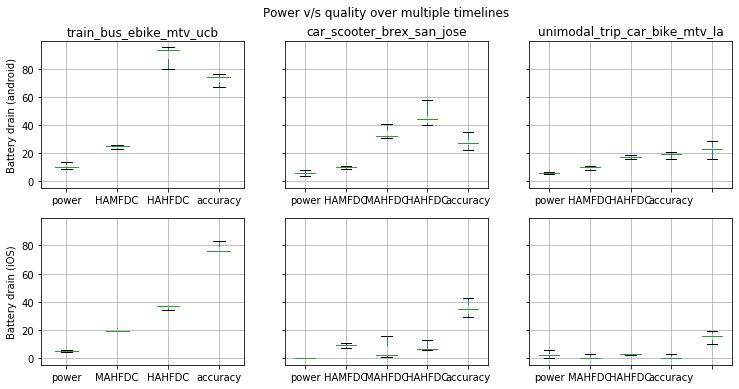

In [27]:
ifig, ax_array = plt.subplots(nrows=2,ncols=3,figsize=(12,6), sharex=False, sharey=True)
timeline_list = ["train_bus_ebike_mtv_ucb", "car_scooter_brex_san_jose", "unimodal_trip_car_bike_mtv_la"]
for i, tl in enumerate(timeline_list):
    battery_drain_df.query("timeline == @tl & phone_os == 'android'").boxplot(ax = ax_array[0][i], column=["battery_drain"], by=["quality"], showbox=False, whis="range")
    ax_array[0][i].set_title(tl)
    battery_drain_df.query("timeline == @tl & phone_os == 'ios'").boxplot(ax = ax_array[1][i], column=["battery_drain"], by=["quality"], showbox=False, whis="range")
    ax_array[1][i].set_title("")

for i, ax in enumerate(ax_array[0]):
    if i == 1:
        ax.set_xticklabels(q2r_complete_list)
    else:
        ax.set_xticklabels(q2r_android_list)
    ax.set_xlabel("")

for i, ax in enumerate(ax_array[1]):
    if i == 1:
        ax.set_xticklabels(q2r_complete_list)
    else:
        ax.set_xticklabels(q2r_ios_list)
    ax.set_xlabel("")

ax_array[0][0].set_ylabel("Battery drain (android)")
ax_array[1][0].set_ylabel("Battery drain (iOS)")
ifig.suptitle("Power v/s quality over multiple timelines")
# ifig.tight_layout()

In [28]:
battery_drain_df.query("quality == 1 & phone_os == 'ios' & timeline == 'car_scooter_brex_san_jose'").iloc[1:].describe()

,battery_drain,duration,run,quality
count,2.000000,2.000000,2.000000,2.0
mean,9.999999,23724.973020,1.500000,1.0
std,1.414216,937.885212,0.707107,0.0
min,8.999997,23061.788027,1.000000,1.0
25%,9.499998,23393.380523,1.250000,1.0
50%,9.999999,23724.973020,1.500000,1.0
75%,10.500000,24056.565517,1.750000,1.0
max,11.000001,24388.158013,2.000000,1.0


In [29]:
battery_drain_df.query("quality == 0 & phone_os == 'ios' & timeline == 'car_scooter_brex_san_jose'").iloc[1:].describe()

,battery_drain,duration,run,quality
count,5.0,5.000000,5.000000,5.0
mean,0.0,22450.517232,3.000000,0.0
std,0.0,1982.294576,1.581139,0.0
min,0.0,19800.271396,1.000000,0.0
25%,0.0,20963.617689,2.000000,0.0
50%,0.0,23109.551352,3.000000,0.0
75%,0.0,24176.554243,4.000000,0.0
max,0.0,24202.591480,5.000000,0.0


In [30]:
battery_drain_df.query("quality == 2 & phone_os == 'ios' & timeline == 'car_scooter_brex_san_jose'").iloc[1:].describe()

,battery_drain,duration,run,quality
count,2.000000,2.000000,2.000000,2.0
mean,1.499999,20381.175861,1.500000,2.0
std,0.707106,816.651186,0.707107,0.0
min,0.999999,19803.716269,1.000000,2.0
25%,1.249999,20092.446065,1.250000,2.0
50%,1.499999,20381.175861,1.500000,2.0
75%,1.749998,20669.905656,1.750000,2.0
max,1.999998,20958.635452,2.000000,2.0
